# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Candra Zulkarnain
- **Email:** candrazulkarnain8@gmail.com
- **ID Dicoding:** candra_zulkarnain

## Menentukan Pertanyaan Bisnis

- Bagaimana penyewaan sepeda dalam satu tahun terakhir?
- Musim apa yang memiliki paling banyak dan paling sedikit penyewa sepeda?
- Bagaimana hubungan cuaca dengan jumlah penyewaan sepeda?
- Bagaimana perbedaan penggunaan sepeda antara casual user dan registered user?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Berdasarkan file readme, berikut adalah karakteristik data dari dataset bike sharing**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

**Insight:**
- Dataset Bike Sharing memiliki dua tabel, yaitu day dan hour
- Tabel day memiliki 16 kolom sedangkan tabel hour memiliki 17 kolom
- Tabel hour lebih detail karena mencatat penyewaan setiap jam, sedangkan tabel day mencatat data per hari

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah data duplikat: ", hour_df.duplicated().sum())

Jumlah data duplikat:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing value, data duplikat dan innacurate value pada day_df maupun hour_df
- Kolom dteday baik pada day_df maupun hour_df seharusnya direpresentasikan sebagai tipe data datetime

### Cleaning Data

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data kolom dteday pada day_df dan hour_df berhasil diubah menjadi datetime menggunakan function to_datetime() serta dipastikan dengan method info()

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
# melihat hubungan cuaca dengan jumlah penyewaan sepeda
print(day_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"]
}))
print('='*50)
# korelasi
correlation = day_df[['weathersit', 'cnt']].corr(method='pearson')
print(correlation)

             cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449
            weathersit       cnt
weathersit    1.000000 -0.297391
cnt          -0.297391  1.000000


In [18]:
day_df[['cnt', 'temp', 'atemp','hum', 'windspeed', 'weathersit']].corr()

,cnt,temp,atemp,hum,windspeed,weathersit
cnt,1.000000,0.627494,0.631066,-0.100659,-0.234545,-0.297391
temp,0.627494,1.000000,0.991702,0.126963,-0.157944,-0.120602
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643,-0.121583
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489,0.591045
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000,0.039511
weathersit,-0.297391,-0.120602,-0.121583,0.591045,0.039511,1.000000


In [19]:
# perbandingan jumlah penyewa sepeda di setiap musim
day_df.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [20]:
#perbedaan casual user dan registered user
day_df[['casual', 'registered']].agg(['sum', 'mean', 'count'])

,casual,registered
sum,620017.000000,2.672662e+06
mean,848.176471,3.656172e+03
count,731.000000,7.310000e+02


**Insight:**
- Berdasarkan data statistik deskriptif, pada saat cuaca cerah, rata-rata jumlah penyewa sepeda lebih tinggi, sedangkan pada saat cuaca buruk (weathersit tinggi), rata-rata jumlah penyewa sepeda lebih sedikit
- Hasil korelasi memiliki nilai -0.297 hal ini menandakan terdapat hubungan negatif antara cuaca dengan jumlah penyewaan sepeda. Nilai ini berada di tingkat lemah, yang menunjukkan bahwa cuaca merupakan salah satu faktor, tetapi bukan satu-satunya yang mempengaruhi jumlah penyewaan sepeda.
- Faktor cuaca yang paling mempengaruhi jumlah penyewa sepeda adalah suhu (temp dan atemp) dengan nilai 0.6, artinya sepeda lebih banyak disewa pada saat cuaca hangat
- Faktor kelembapan memiliki korelasi negatif yang sangat lemah dengan jumlah penyewaan sepeda
- Faktor kecepatan angin memiliki korelasi negatif yang lemah dengan jumlah penyewaan sepeda
- Urutan musim yang memiliki jumlah penyewa sepeda mulai yang paling tinggi sampai terendah yaitu musim gugur, musim panas, musim dingin, musim semi.
- Registered user memiliki jumlah dan rata-rata penyewaan sepeda yang jauh lebih banyak dibanding casual user.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penyewaan sepeda dalam satu tahun terakhir?

In [21]:
month_df = day_df.resample(rule='ME', on='dteday').agg({
    "cnt": "sum"
})
month_df

,cnt
dteday,
2011-01-31,38189
2011-02-28,48215
2011-03-31,64045
2011-04-30,94870
2011-05-31,135821
2011-06-30,143512
2011-07-31,141341
2011-08-31,136691
2011-09-30,127418


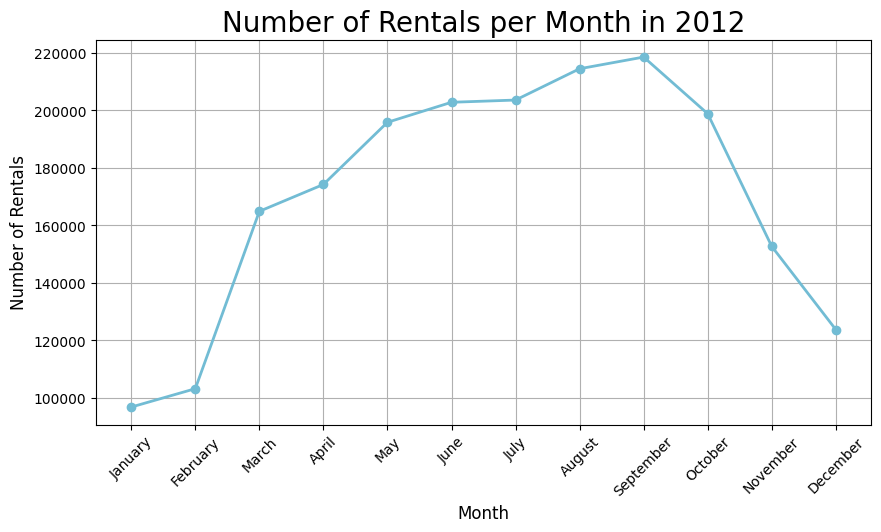

In [22]:
month_df_2012 = month_df[month_df.index.year == 2012]

month_df_2012.index = month_df_2012.index.strftime('%B')
month_df_2012 = month_df_2012.reset_index()

plt.figure(figsize=(10, 5))
plt.plot(month_df_2012['dteday'], month_df_2012['cnt'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Rentals per Month in 2012", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Rentals", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)
plt.grid(True)

### Pertanyaan 2:  Musim apa yang memiliki paling banyak dan paling sedikit penyewa sepeda?

In [23]:
sum_season_df = day_df.groupby("season").agg({"cnt": "sum"}).reset_index()

sum_season_df.rename(columns={"cnt": "rentals_count"}, inplace=True)

sum_season_df = sum_season_df.sort_values(by="rentals_count", ascending=False).reset_index(drop=True)

sum_season_df['season'] = sum_season_df['season'].replace({
    1:'springer', 
    2:'summer', 
    3:'fall', 
    4:'winter'
})

# Cek hasil sum_season_df
print(sum_season_df)


     season  rentals_count
0      fall        1061129
1    summer         918589
2    winter         841613
3  springer         471348


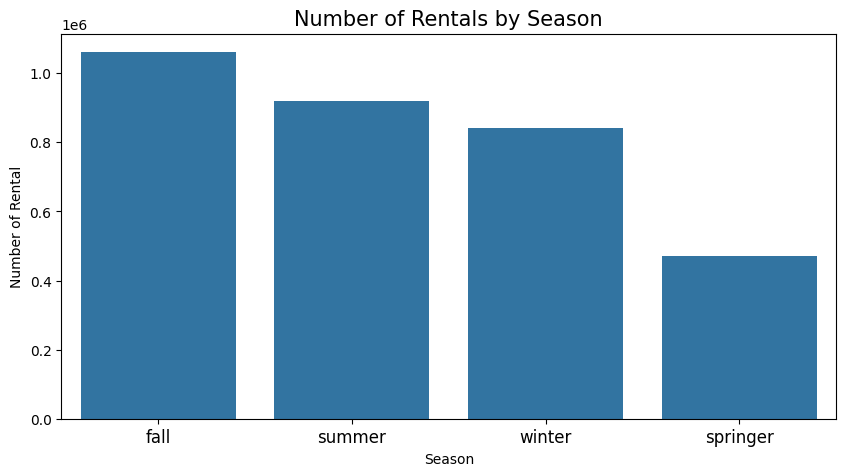

In [24]:
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="rentals_count", 
    x="season",
    data=sum_season_df,
    order = sum_season_df['season']
)
plt.title("Number of Rentals by Season", loc="center", fontsize=15)
plt.ylabel("Number of Rental")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3:  Bagaimana hubungan cuaca dengan jumlah penyewaan sepeda?

In [25]:
weathersit_df = day_df.groupby("weathersit").agg({'cnt':'sum'}).reset_index()

weathersit_df['weathersit'] = weathersit_df['weathersit'].replace({
    1: 'Clear',
    2: 'Misty',
    3: 'Light Precipitation',
    4: 'Heavy Precipitation',
})

weathersit_df

,weathersit,cnt
0,Clear,2257952
1,Misty,996858
2,Light Precipitation,37869


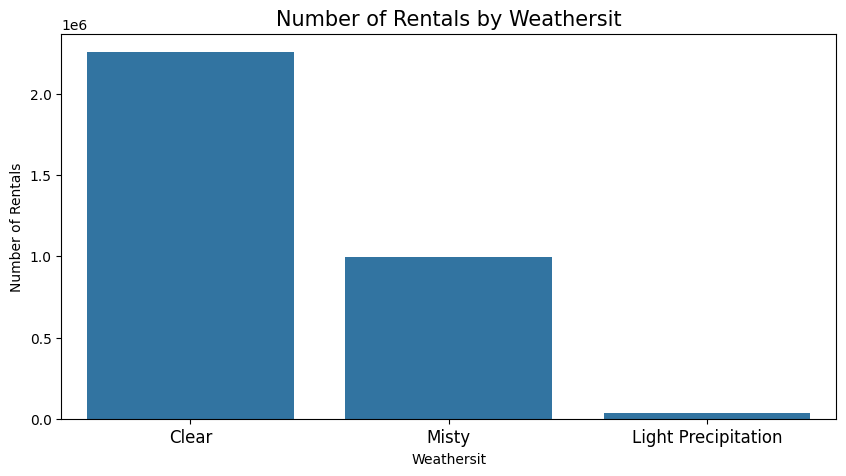

In [34]:
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="cnt", 
    x="weathersit",
    data=weathersit_df,
    order = weathersit_df['weathersit']
)
plt.title("Number of Rentals by Weathersit", loc="center", fontsize=15)
plt.ylabel("Number of Rentals")
plt.xlabel("Weathersit")
plt.tick_params(axis='x', labelsize=12)
plt.show()

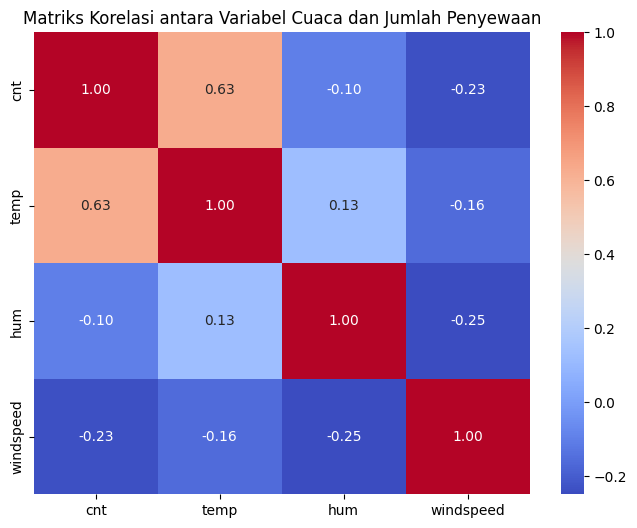

In [27]:
correlation_matrix = day_df[['cnt', 'temp', 'hum', 'windspeed']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi antara Variabel Cuaca dan Jumlah Penyewaan")
plt.show()

### Pertanyaan 4:  Bagaimana perbedaan penggunaan sepeda antara casual user dan registered user?

In [28]:
user_df = pd.DataFrame()
user_df['user_type'] = ['casual', 'registered']
user_df['rentals_count'] = [day_df['casual'].sum(), day_df['registered'].sum()]
user_df = user_df.sort_values(by="rentals_count", ascending=False)
user_df

,user_type,rentals_count
1,registered,2672662
0,casual,620017


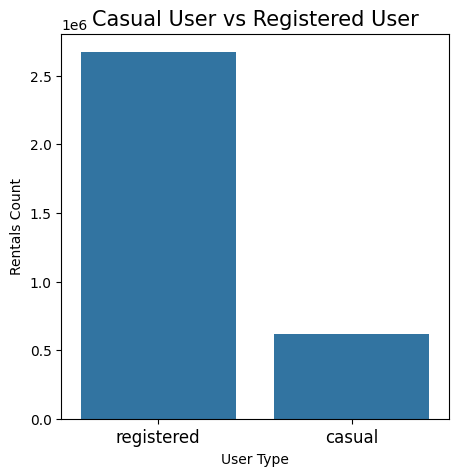

In [35]:
plt.figure(figsize=(5, 5))

sns.barplot(
    y="rentals_count", 
    x="user_type",
    data=user_df
)
plt.title("Casual User vs Registered User", loc="center", fontsize=15)
plt.ylabel("Rentals Count")
plt.xlabel("User Type")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Jumlah penyewaan sepeda tertinggi ada pada Bulan September dan terendah ada pada Bulan Januari
- Musim yang memiliki jumlah penyewaan sepeda terbanyak adalah musim gugur, dan musim yang memiliki jumlah penyewaan sepeda terendah adalah musim semi
- Sama seperti di tahap exploratory, pada saat cuaca cerah penyewa sepeda cenderung meningkat, sedangkan saat cuaca buruk penyewa sepeda menurun. Selain itu, variabel cuaca lain yang mempengaruhi adalah suhu, kelembapan, dan kecepatan angin dengan nilai korelasi tertera pada matriks.
- Penyewa sepeda cenderung didominasi oleh registered user.

## Analisis Lanjutan (Opsional)

Menggunakan teknik binning untuk membagi suhu menjadi tiga kategori

In [30]:
bins = [0, 0.5, 0.75, 1]  
labels = ['Low', 'Medium', 'High']

day_df['temp_category'] = pd.cut(day_df['temp'], bins=bins, labels=labels)

print(day_df[['temp', 'temp_category']].head())

       temp temp_category
0  0.344167           Low
1  0.363478           Low
2  0.196364           Low
3  0.200000           Low
4  0.226957           Low


In [31]:
temp_df = day_df.groupby('temp_category').agg({'cnt': 'sum'})
temp_df.rename(columns={"cnt": "rentals_count"}, inplace=True)
temp_df

C:\Users\candr\AppData\Local\Temp\ipykernel_15648\3182358766.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = day_df.groupby('temp_category').agg({'cnt': 'sum'})


,rentals_count
temp_category,
Low,1249870
Medium,1756249
High,286560


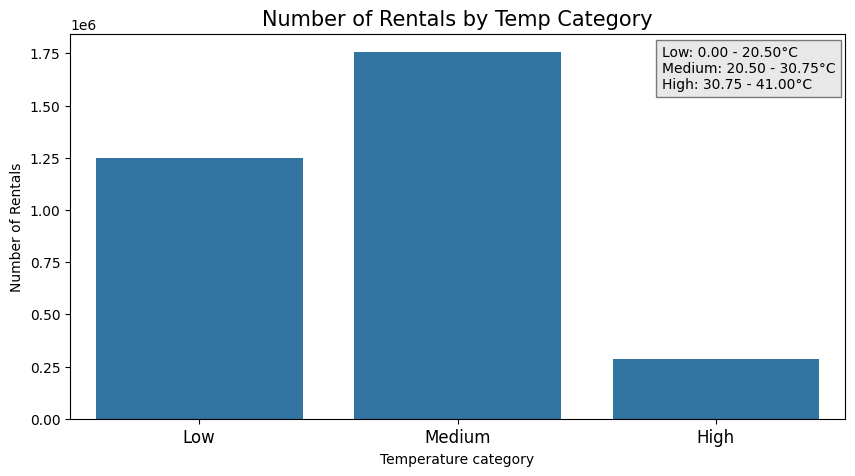

In [32]:
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="rentals_count", 
    x="temp_category",
    data=temp_df
)
plt.title("Number of Rentals by Temp Category", loc="center", fontsize=15)
plt.ylabel("Number of Rentals")
plt.xlabel("Temperature category")
plt.tick_params(axis='x', labelsize=12)

temp_ranges_text = (
    f"Low: {bins[0]*41:.2f} - {bins[1]*41:.2f}°C\n"
    f"Medium: {bins[1]*41:.2f} - {bins[2]*41:.2f}°C\n"
    f"High: {bins[2]*41:.2f} - {bins[3]*41:.2f}°C"
)

# Menempatkan keterangan pada grafik
plt.text(1.79, max(temp_df['rentals_count']) * 0.9, temp_ranges_text,
         fontsize=10, color='black', bbox=dict(facecolor='lightgray', alpha=0.5))

plt.show()

insight:
- penyewaan sepeda cenderung lebih banyak pada saat suhu udara sedang, yaitu kisaran 20.50 - 30.75° C

## Conclusion

## 1. Bagaimana penyewaan sepeda dalam satu tahun terakhir?
- Penyewaan sepeda cenderung bervariasi sepanjang tahun. Jumlah penyewaan tertinggi terjadi pada Bulan September, sedangkan jumlah terendah ada di Bulan Januari.
## 2. Musim apa yang memiliki paling banyak dan paling sedikit penyewa sepeda?
- Urutan musim yang memiliki jumlah penyewa sepeda mulai yang paling tinggi sampai terendah yaitu musim gugur, musim panas, musim dingin, musim semi.
## 3. Bagaimana hubungan cuaca dengan jumlah penyewaan sepeda?
- Cuaca memiliki pengaruh negatif terhadap jumlah penyewaan sepeda, tetapi pengaruhnya tergolong lemah (nilai korelasi -0.297). Artinya, ketika cuaca buruk atau weathersit tinggi, penyewaan sepeda cenderung menurun.
- Suhu merupakan faktor cuaca yang paling mempengaruhi penyewaan sepeda dengan nilai korelasi 0.6. Penyewaan sepeda meningkat saat suhu lebih hangat. Penyewaan cenderung lebih banyak pada suhu sedang, yaitu di kisaran 20.50 - 30.75° C, hal ini menunjukkan bahwa pengguna lebih nyaman menyewa sepeda dalam kondisi cuaca yang tidak terlalu panas atau dingin.
- Kelembapan dan kecepatan angin juga memiliki korelasi negatif yang lemah dengan penyewaan sepeda, menunjukkan bahwa semakin tinggi kelembapan atau kecepatan angin, penyewaan sepeda cenderung sedikit menurun.
- Secara visual, saat cuaca cerah, jumlah penyewa sepeda meningkat, sementara saat cuaca buruk, penyewa berkurang. Selain itu, variabel cuaca lain seperti suhu, kelembapan, dan kecepatan angin juga mempengaruhi jumlah penyewaan, sesuai dengan nilai korelasi yang ditemukan dalam analisis.
## 4. Bagaimana perbedaan penggunaan sepeda antara casual user dan registered user?
- Registered user mendominasi jumlah penyewaan sepeda baik dari segi total jumlah maupun rata-rata penggunaannya. Penyewaan sepeda oleh casual user jauh lebih rendah dibandingkan dengan registered user.